In [231]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [232]:
df= pd.read_pickle("ModelOneHots")

### SVM

In [233]:
#Adjust figure size
plt.rcParams['figure.dpi'] = 75

In [234]:
#Covert the one hots back into chars or you can leave it as onehots
# df.loc[(df['I(1)/E'] == 1),'I(1)/E']='I'
# df.loc[(df['I(1)/E'] == 0),'I(1)/E']='E'

# df.loc[(df['N(1)/S'] == 1),'N(1)/S']='N'
# df.loc[(df['N(1)/S'] == 0),'N(1)/S']='S'

# df.loc[(df['P(1)/J'] == 1),'P(1)/J']='P'
# df.loc[(df['P(1)/J'] == 0),'P(1)/J']='J'

# df.loc[(df['F(1)/T'] == 1),'F(1)/T']='F'
# df.loc[(df['F(1)/T'] == 0),'F(1)/T']='T'

In [235]:
#Spliting up the df to labels and features/onehots.
#We will have multiple lables to identify: 'I(1)/E', 'N(1)/S', 'P(1)/J', 'F(1)/T'
X = df.drop(['myerTypes','I(1)/E', 'N(1)/S', 'P(1)/J', 'F(1)/T'], axis =1) #This is your features/onehots. Remember to drop the labels
myers = df['myerTypes']
I_E = df['I(1)/E'] 
N_S = df['N(1)/S'] 
P_J = df['P(1)/J'] 
F_T = df['F(1)/T'] 

In [236]:
# Train/Test for each individual pairs
I_E_Xtrain, I_E_Xtest, I_E_Ytrain, I_E_Ytest = train_test_split(X, I_E, test_size = 0.2, random_state = 1)
N_S_Xtrain, N_S_Xtest, N_S_Ytrain, N_S_Ytest = train_test_split(X, N_S, test_size = 0.2, random_state = 1)
P_J_Xtrain, P_J_Xtest, P_J_Ytrain, P_J_Ytest = train_test_split(X, P_J, test_size = 0.2, random_state = 1)
F_T_Xtrain, F_T_Xtest, F_T_Ytrain, F_T_Ytest = train_test_split(X, F_T, test_size = 0.2, random_state = 1)
myers_Xtrain, myers_Xtest, myers_Ytrain, myers_Ytest = train_test_split(X, myers, test_size = 0.2, random_state = 1)

In [248]:
#Feature Scaling for All Types
cols = myers_Xtrain.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(myers_Xtrain)
X_test = scaler.transform(myers_Xtest)
#Return the scaled data to dataframe
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
#View the df if needed:
#X_train.describe()

#Run SVM  'Radial Basis Function' default for I/E
clf=SVC() #clf is classification we are assigning a classifer to it
clf.fit(X_train, myers_Ytrain)  #Fitting the model to the classifer, remember X_train has been scaled and  Y_train is the label
labelPredict=clf.predict(X_test) 
print('SVM (rbf) for 16 personality: {0:0.4f}'.format(accuracy_score(myers_Ytest, labelPredict))) 

#Checking for Overfitting or Underfitting 
#We might have to change the 1/0 to letters to check from predict
print("Checking for Under or Over fitting:")
print('-Training set score: {:.4f}'.format(clf.score(X_train, myers_Ytrain)))
print('-Test set score: {:.4f}'.format(clf.score(X_test, myers_Ytest)))
#Precision and Recall
print(classification_report(myers_Ytest, labelPredict))

SVM (rbf) for 16 personality: 0.4674
Checking for Under or Over fitting:
-Training set score: 0.8124
-Test set score: 0.4674
              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        34
        ENFP       0.48      0.29      0.36       147
        ENTJ       1.00      0.02      0.04        49
        ENTP       0.37      0.29      0.32       154
        ESFJ       0.00      0.00      0.00        11
        ESFP       0.00      0.00      0.00        11
        ESTJ       0.00      0.00      0.00         6
        ESTP       0.00      0.00      0.00        16
        INFJ       0.44      0.63      0.52       280
        INFP       0.52      0.79      0.62       375
        INTJ       0.49      0.49      0.49       222
        INTP       0.42      0.57      0.49       248
        ISFJ       0.00      0.00      0.00        28
        ISFP       0.00      0.00      0.00        48
        ISTJ       0.00      0.00      0.00        47
        IS

C:\ProgramData\Anaconda3\envs\TensorFlowGPU\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\TensorFlowGPU\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\TensorFlowGPU\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

SVM (rbf) for Introversion/Extraversion: 0.7654
Checking for Under or Over fitting:
-Training set score: 0.9072
-Test set score: 0.7654
Null accuracy score: 0.7533
[[  38  390]
 [  17 1290]]
              precision    recall  f1-score   support

           E       0.69      0.09      0.16       428
           I       0.77      0.99      0.86      1307

    accuracy                           0.77      1735
   macro avg       0.73      0.54      0.51      1735
weighted avg       0.75      0.77      0.69      1735



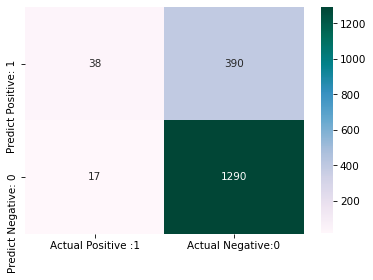

In [237]:
#Feature Scaling for Introversion and Extraversion
cols = I_E_Xtrain.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(I_E_Xtrain)
X_test = scaler.transform(I_E_Xtest)
#Return the scaled data to dataframe
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
#View the df if needed:
#X_train.describe()

#Run SVM  'Radial Basis Function' default for I/E
clf=SVC() #clf is classification we are assigning a classifer to it
clf.fit(X_train, I_E_Ytrain)  #Fitting the model to the classifer, remember X_train has been scaled and  Y_train is the label
labelPredict=clf.predict(X_test) 
print('SVM (rbf) for Introversion/Extraversion: {0:0.4f}'.format(accuracy_score(I_E_Ytest, labelPredict))) 

#Checking for Overfitting or Underfitting 
#We might have to change the 1/0 to letters to check from predict
print("Checking for Under or Over fitting:")
print('-Training set score: {:.4f}'.format(clf.score(X_train, I_E_Ytrain)))
print('-Test set score: {:.4f}'.format(clf.score(X_test, I_E_Ytest)))

#Comparing our Model accuracy to null accuracy
#print(I_E_Ytest.value_counts())  #Unhash if you want to see the distribution
countI = I_E_Ytest.value_counts()[0]
countE = I_E_Ytest.value_counts()[1]
null = (countI/(countI+countE))
print('Null accuracy score: {0:0.4f}'.format(null))
#Confusion Matrix:
IEcm = confusion_matrix(I_E_Ytest, labelPredict)
print(IEcm)
cmMatrix = pd.DataFrame(data=IEcm, columns=['Actual Positive :1', 'Actual Negative:0'], 
                                 index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cmMatrix, annot=True, fmt='d', cmap='PuBuGn')
#Precision and Recall
print(classification_report(I_E_Ytest, labelPredict))

SVM (rbf) for I(N)tuition/Sensing: 0.8697
Checking for Under or Over fitting:
-Training set score: 0.8729
-Test set score: 0.8697
Null accuracy score: 0.8697
[[1509    0]
 [ 226    0]]
              precision    recall  f1-score   support

           N       0.87      1.00      0.93      1509
           S       0.00      0.00      0.00       226

    accuracy                           0.87      1735
   macro avg       0.43      0.50      0.47      1735
weighted avg       0.76      0.87      0.81      1735



C:\ProgramData\Anaconda3\envs\TensorFlowGPU\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\TensorFlowGPU\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\TensorFlowGPU\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

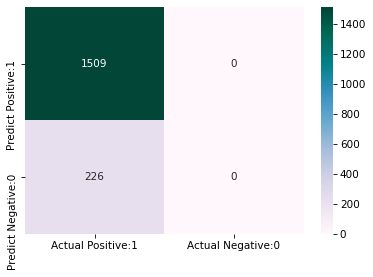

In [238]:
#Feature Scaling for I(N)tuition and Sensing
cols = N_S_Xtrain.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(N_S_Xtrain)
X_test = scaler.transform(N_S_Xtest)
#Return the scaled data to dataframe
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
#View the df if needed:
#X_train.describe()

#Run SVM  'Radial Basis Function' default for I/E
clf=SVC() #clf is classification we are assigning a classifer to it
clf.fit(X_train, N_S_Ytrain)  #Fitting the model to the classifer, remember X_train has been scaled and  Y_train is the label
labelPredict=clf.predict(X_test) 
print('SVM (rbf) for I(N)tuition/Sensing: {0:0.4f}'.format(accuracy_score(N_S_Ytest, labelPredict))) 

#Checking for Overfitting or Underfitting 
#We might have to change the 1/0 to letters to check from predict
print("Checking for Under or Over fitting:")
print('-Training set score: {:.4f}'.format(clf.score(X_train, N_S_Ytrain)))
print('-Test set score: {:.4f}'.format(clf.score(X_test, N_S_Ytest)))

#Comparing our Model accuracy to null accuracy
#print(N_S_Ytest.value_counts())  #Unhash if you want to see the distribution
countN = N_S_Ytest.value_counts()[0]
countS = N_S_Ytest.value_counts()[1]
null = (countN/(countN+countS))
print('Null accuracy score: {0:0.4f}'.format(null))

#Confusion Matrix:
NScm = confusion_matrix(N_S_Ytest, labelPredict)
print(NScm)
cmMatrix = pd.DataFrame(data=NScm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cmMatrix, annot=True, fmt='d', cmap='PuBuGn')
#Precision and Recall
print(classification_report(N_S_Ytest, labelPredict))

SVM (rbf) for Perceiving/Judging: 0.6928
Checking for Under or Over fitting:
-Training set score: 0.9144
-Test set score: 0.6928
Null accuracy score: 0.6098
[[312 365]
 [168 890]]
              precision    recall  f1-score   support

           J       0.65      0.46      0.54       677
           P       0.71      0.84      0.77      1058

    accuracy                           0.69      1735
   macro avg       0.68      0.65      0.65      1735
weighted avg       0.69      0.69      0.68      1735



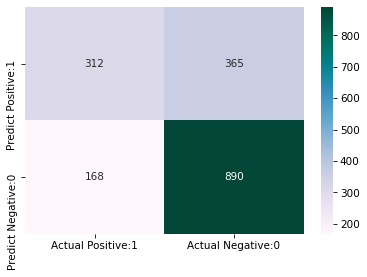

In [239]:
#Feature Scaling for Perceiving and Judging
cols = P_J_Xtrain.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(P_J_Xtrain)
X_test = scaler.transform(P_J_Xtest)
#Return the scaled data to dataframe
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
#View the df if needed:
#X_train.describe()

#Run SVM  'Radial Basis Function' default for I/E
clf=SVC() #clf is classification we are assigning a classifer to it
clf.fit(X_train, P_J_Ytrain)  #Fitting the model to the classifer, remember X_train has been scaled and  Y_train is the label
labelPredict=clf.predict(X_test) 
print('SVM (rbf) for Perceiving/Judging: {0:0.4f}'.format(accuracy_score(P_J_Ytest, labelPredict))) 

#Checking for Overfitting or Underfitting 
#We might have to change the 1/0 to letters to check from predict
print("Checking for Under or Over fitting:")
print('-Training set score: {:.4f}'.format(clf.score(X_train, P_J_Ytrain)))
print('-Test set score: {:.4f}'.format(clf.score(X_test, P_J_Ytest)))

#Comparing our Model accuracy to null accuracy
#print(P_J_Ytest.value_counts())  #Unhash if you want to see the distribution
countP = P_J_Ytest.value_counts()[0]
countJ = P_J_Ytest.value_counts()[1]
null = (countP/(countP+countJ))
print('Null accuracy score: {0:0.4f}'.format(null))

#Confusion Matrix:
PJcm = confusion_matrix(P_J_Ytest, labelPredict)
print(PJcm)
cmMatrix = pd.DataFrame(data=PJcm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cmMatrix, annot=True, fmt='d', cmap='PuBuGn')
#Precision and Recall
print(classification_report(P_J_Ytest, labelPredict))

SVM (rbf) for Introversion/Extraversion: 0.7804
Checking for Under or Over fitting:
-Training set score: 0.9323
-Test set score: 0.7804
Null accuracy score: 0.5383
[[759 175]
 [206 595]]
              precision    recall  f1-score   support

           F       0.79      0.81      0.80       934
           T       0.77      0.74      0.76       801

    accuracy                           0.78      1735
   macro avg       0.78      0.78      0.78      1735
weighted avg       0.78      0.78      0.78      1735



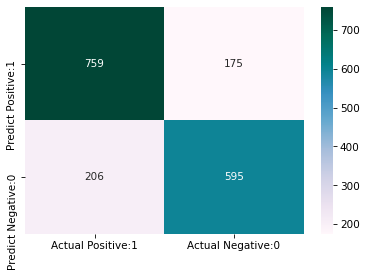

In [240]:
#Feature Scaling for Feeling and Thinking
cols = F_T_Xtrain.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(F_T_Xtrain)
X_test = scaler.transform(F_T_Xtest)
#Return the scaled data to dataframe
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
#View the df if needed:
#X_train.describe()

#Run SVM  'Radial Basis Function' default for F/T
clf=SVC() #clf is classification we are assigning a classifer to it
clf.fit(X_train, F_T_Ytrain)  #Fitting the model to the classifer, remember X_train has been scaled and  Y_train is the label
labelPredict=clf.predict(X_test) 
print('SVM (rbf) for Introversion/Extraversion: {0:0.4f}'.format(accuracy_score(F_T_Ytest, labelPredict))) 

#Checking for Overfitting or Underfitting 
#We might have to change the 1/0 to letters to check from predict
print("Checking for Under or Over fitting:")
print('-Training set score: {:.4f}'.format(clf.score(X_train, F_T_Ytrain)))
print('-Test set score: {:.4f}'.format(clf.score(X_test, F_T_Ytest)))

#Comparing our Model accuracy to null accuracy
#print(F_T_Ytest.value_counts())  #Unhash if you want to see the distribution
countF = F_T_Ytest.value_counts()[0]
countT = F_T_Ytest.value_counts()[1]
null = (countF/(countF+countT))
print('Null accuracy score: {0:0.4f}'.format(null))

#Confusion Matrix:
FTcm = confusion_matrix(F_T_Ytest, labelPredict)
print(FTcm)
cmMatrix = pd.DataFrame(data=FTcm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cmMatrix, annot=True, fmt='d', cmap='PuBuGn')
#Precision and Recall
print(classification_report(F_T_Ytest, labelPredict))

### SVG(Sigmoid)

In [247]:
#Feature Scaling for Introversion and Extraversion
cols = myers_Xtrain.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(myers_Xtrain)
X_test = scaler.transform(myers_Xtest)
#Return the scaled data to dataframe
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
#View the df if needed:
#X_train.describe()

#Run SVM  'Radial Basis Function' default for I/E
clf=SVC(kernel='sigmoid') #clf is classification we are assigning a classifer to it
clf.fit(X_train, myers_Ytrain)  #Fitting the model to the classifer, remember X_train has been scaled and  Y_train is the label
labelPredict=clf.predict(X_test) 
print('SVM (rbf) for 16 personality: {0:0.4f}'.format(accuracy_score(myers_Ytest, labelPredict))) 

#Checking for Overfitting or Underfitting 
#We might have to change the 1/0 to letters to check from predict
print("Checking for Under or Over fitting:")
print('-Training set score: {:.4f}'.format(clf.score(X_train, myers_Ytrain)))
print('-Test set score: {:.4f}'.format(clf.score(X_test, myers_Ytest)))
#Precision and Recall
print(classification_report(myers_Ytest, labelPredict))

SVM (rbf) for 16 personality: 0.4703
Checking for Under or Over fitting:
-Training set score: 0.4818
-Test set score: 0.4703
              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        34
        ENFP       0.39      0.35      0.37       147
        ENTJ       0.27      0.06      0.10        49
        ENTP       0.38      0.40      0.39       154
        ESFJ       0.00      0.00      0.00        11
        ESFP       0.00      0.00      0.00        11
        ESTJ       0.00      0.00      0.00         6
        ESTP       0.00      0.00      0.00        16
        INFJ       0.45      0.60      0.52       280
        INFP       0.56      0.77      0.65       375
        INTJ       0.46      0.46      0.46       222
        INTP       0.44      0.54      0.49       248
        ISFJ       0.00      0.00      0.00        28
        ISFP       0.00      0.00      0.00        48
        ISTJ       0.00      0.00      0.00        47
        IS

C:\ProgramData\Anaconda3\envs\TensorFlowGPU\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\TensorFlowGPU\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\TensorFlowGPU\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

SVM (sigmoid) for Introversion/Extraversion: 0.7677
Checking for Under or Over fitting:
-Training set score: 0.7728
-Test set score: 0.7677
Null accuracy score: 0.7533
[[  93  335]
 [  68 1239]]
              precision    recall  f1-score   support

           E       0.58      0.22      0.32       428
           I       0.79      0.95      0.86      1307

    accuracy                           0.77      1735
   macro avg       0.68      0.58      0.59      1735
weighted avg       0.74      0.77      0.73      1735



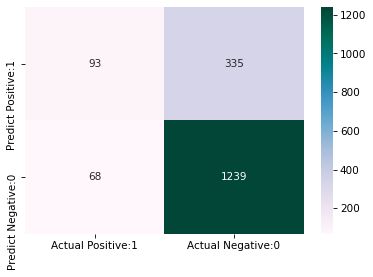

In [241]:
#Feature Scaling for Introversion and Extraversion
cols = I_E_Xtrain.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(I_E_Xtrain)
X_test = scaler.transform(I_E_Xtest)
#Return the scaled data to dataframe
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
#View the df if needed:
#X_train.describe()

#Run SVM  'Radial Basis Function' default for I/E
clf=SVC(kernel='sigmoid') #clf is classification we are assigning a classifer to it
clf.fit(X_train, I_E_Ytrain)  #Fitting the model to the classifer, remember X_train has been scaled and  Y_train is the label
labelPredict=clf.predict(X_test) 
print('SVM (sigmoid) for Introversion/Extraversion: {0:0.4f}'.format(accuracy_score(I_E_Ytest, labelPredict))) 

#Checking for Overfitting or Underfitting 
#We might have to change the 1/0 to letters to check from predict
print("Checking for Under or Over fitting:")
print('-Training set score: {:.4f}'.format(clf.score(X_train, I_E_Ytrain)))
print('-Test set score: {:.4f}'.format(clf.score(X_test, I_E_Ytest)))

#Comparing our Model accuracy to null accuracy
#print(I_E_Ytest.value_counts())  #Unhash if you want to see the distribution
countI = I_E_Ytest.value_counts()[0]
countE = I_E_Ytest.value_counts()[1]
null = (countI/(countI+countE))
print('Null accuracy score: {0:0.4f}'.format(null))

#Confusion Matrix:
IEcm = confusion_matrix(I_E_Ytest, labelPredict)
print(IEcm)
cmMatrix = pd.DataFrame(data=IEcm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cmMatrix, annot=True, fmt='d', cmap='PuBuGn')
#Precision and Recall
print(classification_report(I_E_Ytest, labelPredict))

SVM (sigmoid) for I(N)tuition/Sensing: 0.8692
Checking for Under or Over fitting:
-Training set score: 0.8588
-Test set score: 0.8692
Null accuracy score: 0.8697
[[1508    1]
 [ 226    0]]
              precision    recall  f1-score   support

           N       0.87      1.00      0.93      1509
           S       0.00      0.00      0.00       226

    accuracy                           0.87      1735
   macro avg       0.43      0.50      0.47      1735
weighted avg       0.76      0.87      0.81      1735



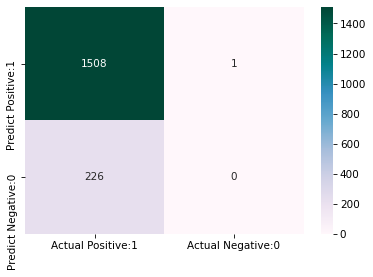

In [242]:
#Feature Scaling for I(N)tuition and Sensing
cols = N_S_Xtrain.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(N_S_Xtrain)
X_test = scaler.transform(N_S_Xtest)
#Return the scaled data to dataframe
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
#View the df if needed:
#X_train.describe()

#Run SVM  'Radial Basis Function' default for I/E
clf=SVC(kernel='sigmoid') #clf is classification we are assigning a classifer to it
clf.fit(X_train, N_S_Ytrain)  #Fitting the model to the classifer, remember X_train has been scaled and  Y_train is the label
labelPredict=clf.predict(X_test) 
print('SVM (sigmoid) for I(N)tuition/Sensing: {0:0.4f}'.format(accuracy_score(N_S_Ytest, labelPredict))) 

#Checking for Overfitting or Underfitting 
#We might have to change the 1/0 to letters to check from predict
print("Checking for Under or Over fitting:")
print('-Training set score: {:.4f}'.format(clf.score(X_train, N_S_Ytrain)))
print('-Test set score: {:.4f}'.format(clf.score(X_test, N_S_Ytest)))

#Comparing our Model accuracy to null accuracy
#print(N_S_Ytest.value_counts())  #Unhash if you want to see the distribution
countN = N_S_Ytest.value_counts()[0]
countS = N_S_Ytest.value_counts()[1]
null = (countN/(countN+countS))
print('Null accuracy score: {0:0.4f}'.format(null))

#Confusion Matrix:
NScm = confusion_matrix(N_S_Ytest, labelPredict)
print(NScm)
cmMatrix = pd.DataFrame(data=NScm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cmMatrix, annot=True, fmt='d', cmap='PuBuGn')
#Precision and Recall
print(classification_report(N_S_Ytest, labelPredict))

SVM (sigmoid) for Perceiving/Judging: 0.6893
Checking for Under or Over fitting:
-Training set score: 0.6661
-Test set score: 0.6893
Null accuracy score: 0.6098
[[355 322]
 [217 841]]
              precision    recall  f1-score   support

           J       0.62      0.52      0.57       677
           P       0.72      0.79      0.76      1058

    accuracy                           0.69      1735
   macro avg       0.67      0.66      0.66      1735
weighted avg       0.68      0.69      0.68      1735



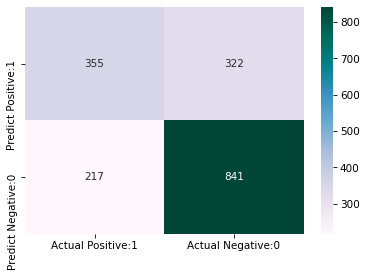

In [243]:
#Feature Scaling for Perceiving and Judging
cols = P_J_Xtrain.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(P_J_Xtrain)
X_test = scaler.transform(P_J_Xtest)
#Return the scaled data to dataframe
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
#View the df if needed:
#X_train.describe()

#Run SVM  'Radial Basis Function' default for I/E
clf=SVC(kernel = "sigmoid") #clf is classification we are assigning a classifer to it
clf.fit(X_train, P_J_Ytrain)  #Fitting the model to the classifer, remember X_train has been scaled and  Y_train is the label
labelPredict=clf.predict(X_test) 
print('SVM (sigmoid) for Perceiving/Judging: {0:0.4f}'.format(accuracy_score(P_J_Ytest, labelPredict))) 

#Checking for Overfitting or Underfitting 
#We might have to change the 1/0 to letters to check from predict
print("Checking for Under or Over fitting:")
print('-Training set score: {:.4f}'.format(clf.score(X_train, P_J_Ytrain)))
print('-Test set score: {:.4f}'.format(clf.score(X_test, P_J_Ytest)))

#Comparing our Model accuracy to null accuracy
#print(P_J_Ytest.value_counts())  #Unhash if you want to see the distribution
countP = P_J_Ytest.value_counts()[0]
countJ = P_J_Ytest.value_counts()[1]
null = (countP/(countP+countJ))
print('Null accuracy score: {0:0.4f}'.format(null))

#Confusion Matrix:
PJcm = confusion_matrix(P_J_Ytest, labelPredict)
print(PJcm)
cmMatrix = pd.DataFrame(data=PJcm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cmMatrix, annot=True, fmt='d', cmap='PuBuGn')
#Precision and Recall
print(classification_report(P_J_Ytest, labelPredict))

SVM (sigmoid) for Introversion/Extraversion: 0.7620
Checking for Under or Over fitting:
-Training set score: 0.7406
-Test set score: 0.7620
Null accuracy score: 0.5383
[[726 208]
 [205 596]]
              precision    recall  f1-score   support

           F       0.78      0.78      0.78       934
           T       0.74      0.74      0.74       801

    accuracy                           0.76      1735
   macro avg       0.76      0.76      0.76      1735
weighted avg       0.76      0.76      0.76      1735



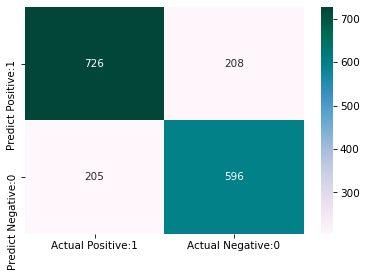

In [244]:
#Feature Scaling for Feeling and Thinking
cols = F_T_Xtrain.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(F_T_Xtrain)
X_test = scaler.transform(F_T_Xtest)
#Return the scaled data to dataframe
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
#View the df if needed:
#X_train.describe()

#Run SVM  'Radial Basis Function' default for F/T
clf=SVC(kernel = 'sigmoid') #clf is classification we are assigning a classifer to it
clf.fit(X_train, F_T_Ytrain)  #Fitting the model to the classifer, remember X_train has been scaled and  Y_train is the label
labelPredict=clf.predict(X_test) 
print('SVM (sigmoid) for Introversion/Extraversion: {0:0.4f}'.format(accuracy_score(F_T_Ytest, labelPredict))) 

#Checking for Overfitting or Underfitting 
#We might have to change the 1/0 to letters to check from predict
print("Checking for Under or Over fitting:")
print('-Training set score: {:.4f}'.format(clf.score(X_train, F_T_Ytrain)))
print('-Test set score: {:.4f}'.format(clf.score(X_test, F_T_Ytest)))

#Comparing our Model accuracy to null accuracy
#print(F_T_Ytest.value_counts())  #Unhash if you want to see the distribution
countF = F_T_Ytest.value_counts()[0]
countT = F_T_Ytest.value_counts()[1]
null = (countF/(countF+countT))
print('Null accuracy score: {0:0.4f}'.format(null))
#Comparing this to the Test set score: 0.7654 the classifier SVC(rbf) is doing a decent job of predicting class labels

#Confusion Matrix:
FTcm = confusion_matrix(F_T_Ytest, labelPredict)
print(FTcm)
cmMatrix = pd.DataFrame(data=FTcm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cmMatrix, annot=True, fmt='d', cmap='PuBuGn')
#Precision and Recall
print(classification_report(F_T_Ytest, labelPredict))

### GridSearch

In [40]:
from sklearn.model_selection import GridSearchCV

clf=SVC() 
parameters = [ {'C':[1, 10, 100], 'kernel':['linear']},
               {'C':[1, 10, 100], 'kernel':['rbf'], 'gamma':[.1,.5,1]},
               {'C':[1, 10, 100], 'kernel':['sigmoid'], 'gamma':[.1,.5,1]} 
              ]
grid_search = GridSearchCV(estimator = clf,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0,
                           n_jobs = -1)
grid_search.fit(featuresTrain, types_train)

KeyboardInterrupt: 